*Python Machine Learning 3rd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2019

Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt)

# Python Machine Learning - Code Examples

In [1]:
from IPython.display import Image
%matplotlib inline

### Sythetic Example

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

#from sklearn.svm import SVC

#creating a dataframe of 1000 samples with random values with three feature columns and a class column
sdf = pd.DataFrame(np.random.randint(2,100,size=(1000, 4)), columns=['f1','f2','f3','diag'])

#setting 100 samples to "diag" class = 1 = Malignant
for x in range(100):
  sdf.loc[x,'diag'] = 1

X = sdf.iloc[:,0:3]
y = sdf.iloc[:,3]

#setting the 900 to "diag" class = 0 = Benign
y[y != 1] = 0


0    900
1    100
Name: diag, dtype: int64


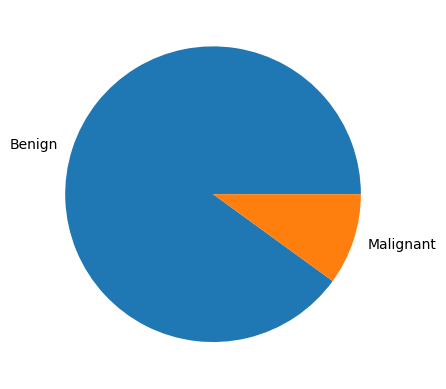

In [3]:
print(sdf["diag"].value_counts())
labels=["Benign", "Malignant"]
plt.pie(sdf["diag"].value_counts(), labels=labels)
plt.show()

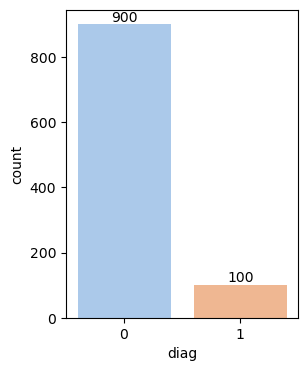

In [4]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x="diag",data=sdf,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [5]:
pipe_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=5))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)

print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))

Test Accuracy: 0.896


In [6]:
from sklearn.dummy import DummyClassifier

#using most frequent class to prdict
dummy_majority = DummyClassifier(strategy='most_frequent') 

dummy_majority.fit(X_train, y_train)
print('Accuracy of Dummy Classifier is: ', dummy_majority.score(X_test, y_test))

Accuracy of Dummy Classifier is:  0.916


### Real World  Example

In [7]:
ccdf = pd.read_csv("creditcard.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

In [ ]:
ccdf

In [ ]:
print(ccdf["Class"].value_counts())
labels=["Genuine", "Fraud"]
plt.pie(ccdf["Class"].value_counts(), labels=labels)
plt.show()

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=ccdf,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
ccdf = ccdf.drop(59510) # the last column has Nan values

X = ccdf.iloc[:,0:30]
y = ccdf.iloc[:,30]

pipe_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=5))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)

print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))

In [ ]:
from sklearn.dummy import DummyClassifier

#using most frequent class to prdict
dummy_majority = DummyClassifier(strategy='most_frequent') 

dummy_majority.fit(X_train, y_train)
print('Accuracy of Dummy Classifier is: ', dummy_majority.score(X_test, y_test))

...

## Loading the Breast Cancer Wisconsin dataset

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# if the Breast Cancer dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df = pd.read_csv('wdbc.data', header=None)

df.head()

In [ ]:
df.shape

In [ ]:
print(df[1].value_counts())
labels=["Benign", "Malignant"]
plt.pie(df[1].value_counts(), labels=labels)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

In [ ]:
le.transform(['M', 'B'])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

## Reading a confusion matrix

In [ ]:
#Image(filename='images/06_08.png', width=300) 

## Combining transformers and estimators in a pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


pipe_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=5))

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)

print(confmat)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))

training_score= cross_val_score(pipe_knn,X_train,y_train,cv=5)
print('Training accuracy score of {} is {}'.format("kNN",round(training_score.mean()*100,2)))
train_pred = cross_val_predict(pipe_knn, X_train, y_train, cv=5)
print('Roc_Auc training score for {} is {} '.format("kNN", round(roc_auc_score(y_train,train_pred)*100,2)))

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

We conclude:

Assuming that class 1 (malignant) is the positive class in this example, our model correctly classified 71 of the examples that belong to class 0 (true negatives) and 39 examples that belong to class 1 (true positives), respectively. However, our model also incorrectly misclassified 1 example from class 0 as class 1 (false positive), and it predicted that 3 examples are benign although it is a malignant tumor (false negatives).

Note that the (true) class 0 examples that are correctly predicted as class 0 (true negatives) are now in the upper left corner of the matrix (index 0, 0). 

BUT, we want the true negatives to be lower right corner of the confusion matrix and true positive in the upper left corner of the confusion matrix.

In [ ]:
#Image(filename='images/06_08.png', width=300) 

In order to change the ordering so that the true negatives are in the lower right corner (index 1,1) and the true positves are in the upper left, we can use the `labels` argument like shown below:

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#cm = confusion_matrix(y_true, y_preds, normalize='all')
cmd = ConfusionMatrixDisplay(confmat, display_labels=['P','N'])
cmd.plot()

## Receiver Operating Characteristics (ROC) Area Under the Curve (AUC)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# smaller training set to make the curve more interesting
#X_train2 = X_train[:, [4, 14]]
#print(X_train[0,:])
#print(X_train2[0])
X_train2 = X_train[:, :]

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())


fig = plt.figure(figsize=(7, 5))


#############################################################
### TRAINING ROC CURVE
train_probas = pipe_knn.fit(X_train2,
                            y_train).predict_proba(X_train2)

fpr, tpr, thresholds = roc_curve(y_train,
                                 train_probas[:, 1],
                                 pos_label=1)

print("X_train2: ", X_train2[0])
print("train_prob: ", train_probas[0])
print("train_fpr: ", fpr)
print("train_tpr: ", tpr)
print("train_thr: ",thresholds)
print()
print()

roc_auc = auc(fpr, tpr)

plt.step(fpr,
         tpr,
         label='Train ROC (area = %0.2f)'
               % (roc_auc))
#############################################################


#############################################################
### TEST ROC CURVE
#test_probas = pipe_knn.predict_proba(X_test[:,[4, 14]])
test_probas = pipe_knn.predict_proba(X_test[:, :])

fpr, tpr, thresholds = roc_curve(y_test,
                                 test_probas[:, 1],
                                 pos_label=1)

print("test_fpr: ", fpr)
print("test_tpr: ", tpr)
print("test_thr: ",thresholds)

roc_auc = auc(fpr, tpr)

plt.step(fpr,
         tpr,
         where='post',
         label='Test ROC (area = %0.2f)'
               % (roc_auc))
#############################################################

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

## Accuracy, Precision, Recall and F1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))